# Animals10 Dataset Exploration
This notebook explores the Animals-10 dataset

## Download Dataset from kaggle

[Animals-10](https://www.kaggle.com/datasets/alessiocorrado99/animals10/data)

## Module imports

In [1]:
# ! pip install -q plotpy

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image_dataset_from_directory

2024-09-25 10:42:32.060804: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-25 10:42:32.060907: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-25 10:42:32.062999: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-25 10:42:32.073552: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-25 10:42:33.241968: W tensorflow/compiler/tf2

## Review Dataset

### Load dataset

In [3]:
# Load images in a numpy array
dataset_folder = 'dataset/raw-img'

class_translation = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "ragno": "spider",
    "scoiattolo": "squirrel",
}

# rename class folders based on dictionnary
for folder in os.listdir(dataset_folder):
    if folder in class_translation:
        os.rename(f"{dataset_folder}/{folder}", f"{dataset_folder}/{class_translation[folder]}")

# load images from dataset folder
dataset= image_dataset_from_directory(
    dataset_folder,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=None,
    image_size=(256, 256),
    shuffle=True,
    seed=99,
)

print(dataset.class_names)
print(len(dataset))


Found 26179 files belonging to 10 classes.
['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
26179


### Check image and labels

In [15]:
# Let's have a look at pictures and labels
image, label= next(iter(dataset.take(1)))

print(image.shape)
print(label.shape)
print(image)
print(label)

# images are tensors of shape (256, 256, 3)
# labels are one-hot-encoded vectors of shape (10,)

(256, 256, 3)
(10,)
tf.Tensor(
[[[117.08594    123.08594    123.08594   ]
  [118.25781    124.25781    124.25781   ]
  [119.42969    125.42969    125.42969   ]
  ...
  [ 24.          11.           2.4296875 ]
  [ 24.742188    12.484375     1.2578125 ]
  [ 25.          13.           1.        ]]

 [[117.9043     123.9043     123.9043    ]
  [119.07617    125.07617    125.07617   ]
  [120.24805    126.24805    126.24805   ]
  ...
  [ 22.363281     9.363281     0.79296875]
  [ 22.498093     9.632904     0.22846985]
  [ 23.292953    10.474594     0.92967224]]

 [[119.42055    125.42055    125.42055   ]
  [119.95508    125.95508    125.95508   ]
  [121.42656    127.42656    127.42656   ]
  ...
  [ 18.214066     7.006256     0.13008118]
  [ 18.513672     7.6054688    0.        ]
  [ 18.79039      7.882187     0.27671814]]

 ...

 [[100.08594    104.08594    105.08594   ]
  [101.17976    105.17976    106.17976   ]
  [102.257034   106.257034   107.257034  ]
  ...
  [ 90.          94.          

### Preview Images

In [ ]:
# print a random image
image, label= next(iter(dataset.take(1)))
image_np = image.numpy().astype('uint8')
plt.imshow(image_np)
plt.axis('off')
plt.title(label)
plt.show()

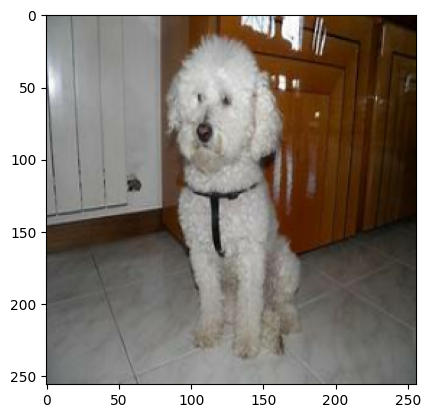

In [16]:
image_np = image.numpy().astype('uint8')
plt.imshow(image_np)
plt.axis('off')
plt.show()

In [19]:
# Get the class names
class_names = dataset.class_names

def plot_random_images(x_data, y_data, num_images=10, image_size=(1, 1)):

    num_categories = len(class_names)

    # Create a figure with subplots
    fig, axes = plt.subplots(num_categories, num_images, figsize=(num_images * image_size[0], num_categories * image_size[1]))

    # Loop through each category
    for i in range(num_categories):

        # Find indices of images belonging to the current category
        indices = np.where(y_data == i)[0]

        # Randomly choose 'num_images' indices
        chosen_indices = np.random.choice(indices, num_images, replace=False)

        # Loop through and plot the images
        for j, index in enumerate(chosen_indices):
            axes[i, j].imshow(x_data[index], cmap='gray')
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()


plot_random_images(x_train, y_train)


['butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'elephant',
 'horse',
 'sheep',
 'spider',
 'squirrel']

## Note
At this point we were having too much trouble working with the Animals-10 dataset and we decided to move on and use Cifar10.